In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv('loan_dataset.csv')

In [31]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,NaN,No,9600000,29900000,12,778,2400000.0,17600000.0,NaN,8000000.0,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,NaN,2200000.0,8800000.0,3300000.0,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000.0,NaN,33300000.0,12800000.0,Rejected
3,4,3,NaN,No,8200000,30700000,8,467,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [32]:
df.drop('loan_id',axis=True,inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   int64  
 1   education                 3629 non-null   object 
 2   self_employed             3928 non-null   object 
 3   income_annum              4269 non-null   int64  
 4   loan_amount               4269 non-null   int64  
 5   loan_term                 4269 non-null   int64  
 6   cibil_score               4269 non-null   int64  
 7   residential_assets_value  3885 non-null   float64
 8   commercial_assets_value   4141 non-null   float64
 9   luxury_assets_value       4013 non-null   float64
 10  bank_asset_value          3843 non-null   float64
 11  loan_status               4269 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 400.3+ KB


In [34]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,3.885000e+03,4.141000e+03,4.013000e+03,3.843000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.471197e+06,4.974934e+06,1.509556e+07,4.960161e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.513098e+06,4.377911e+06,9.128965e+06,3.229474e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.450000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [35]:
df.isnull().sum()

no_of_dependents              0
education                   640
self_employed               341
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    384
commercial_assets_value     128
luxury_assets_value         256
bank_asset_value            426
loan_status                   0
dtype: int64

In [36]:
categorical=[]
numerical=[]

for col in df:
    if df[col].dtype=='O':
        categorical.append(col)
        
    else:
        numerical.append(col)

print("categorical cols:",categorical)
print()
print("numerical cols:",numerical)

categorical cols: ['education', 'self_employed', 'loan_status']

numerical cols: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


# <center>=====Visualising The Data====<center>

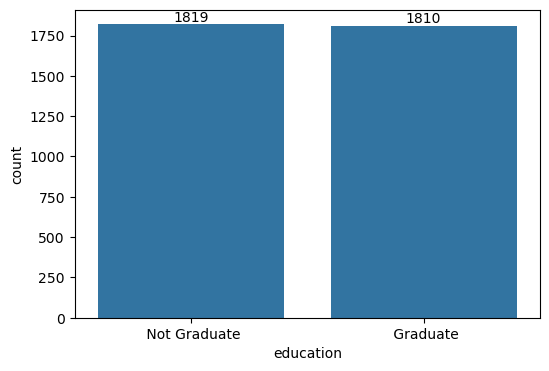

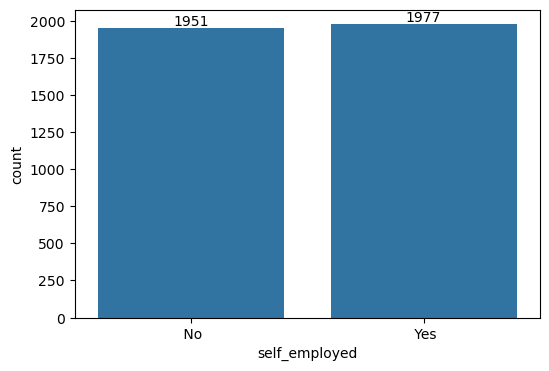

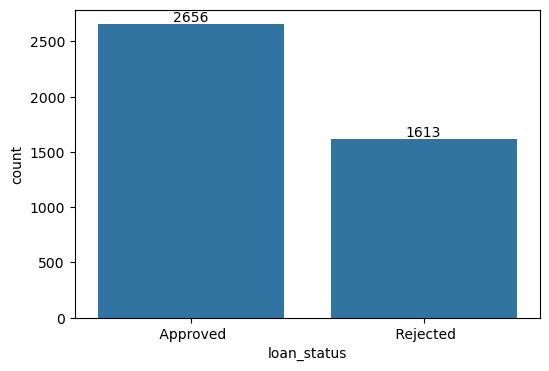

In [37]:
# countplot

for col in df[categorical]:
    plt.figure(figsize=(6,4))
    ax=sns.countplot(df[categorical],x=col)
    for bar in ax.containers:
        ax.bar_label(bar)

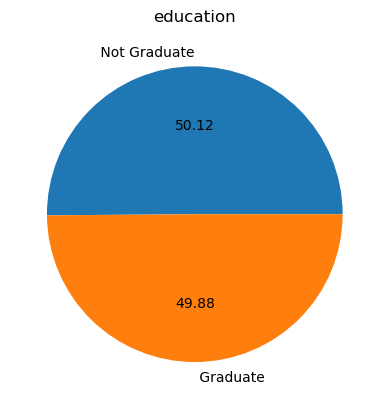

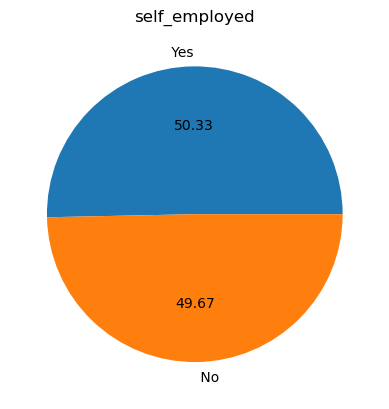

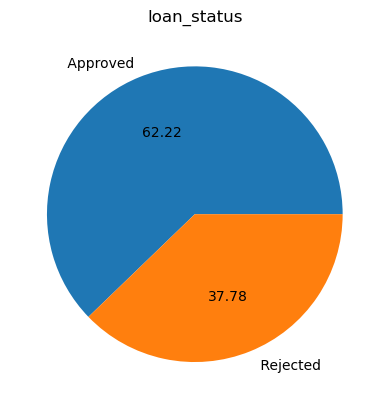

In [38]:
# pie chart of cols

for col in df[categorical]:
    df[col].value_counts()
    
    value=df[col].value_counts()
    index=df[col].value_counts().index
    
    plt.pie(x=value,labels=index,autopct='%.2f')
    plt.title(col)
    plt.show() 
    

> From the above graphs we see that in education column percentage of <b>Not Graduate(50.12%)</b> and <b>Graduate(49.88%)</b>
  is almost same . 
  
> And same for self employed column where percentage of <b>self employed(50.33%) and Not self employed(49.67%)</b> 
  is also almost equal.
  
> In Loan status column percentage of <b>Approved(62.22%) and rejected(37.78%).</b>

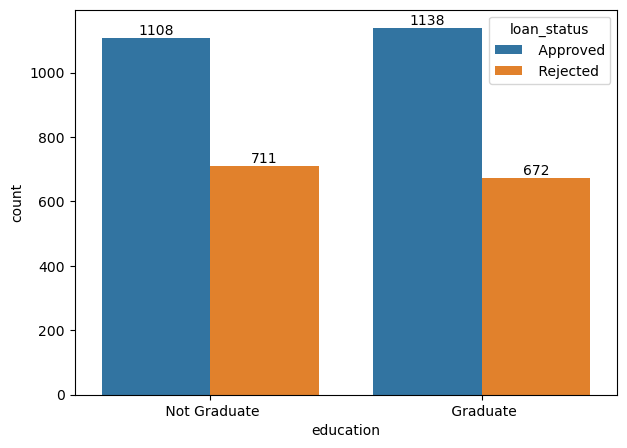

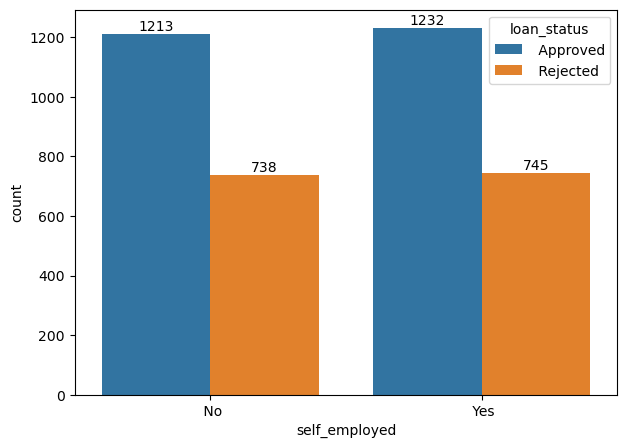

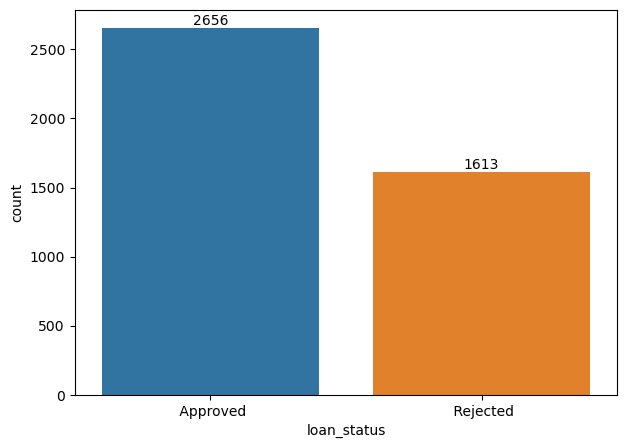

In [39]:
for col in df[categorical]:
    plt.figure(figsize=(7,5))
    ax=sns.countplot(df[categorical],x=col,hue='loan_status')
    for bar in ax.containers:
        ax.bar_label(bar)

> From the above graphs we can analysis that education does not affect the loan status as <b>Graduate and Not Graduate</b>
  people have almost same level of loan approved and reject.

> And same for self employment as <b>self employed people and Not self employed people</b> have almost same level of loan 
  approved and reject.

# <center>====Analysing Relation between columns====</center>

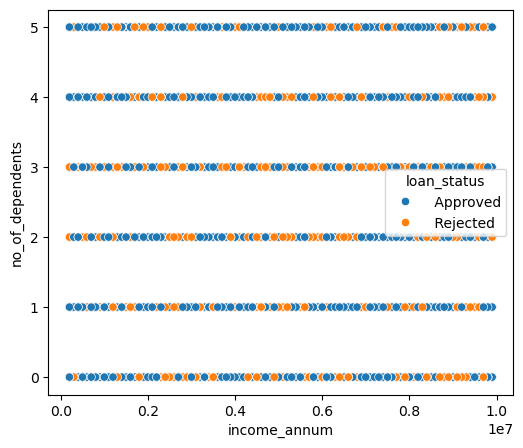

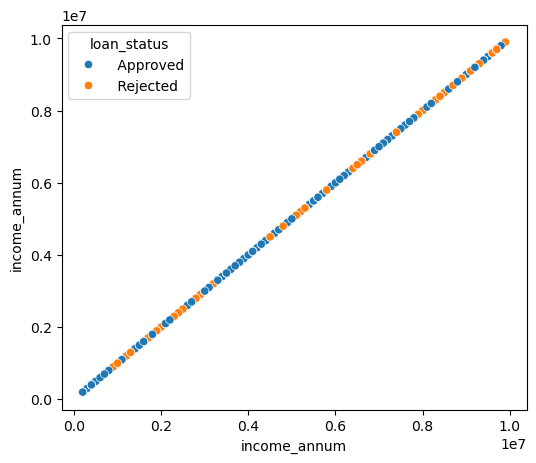

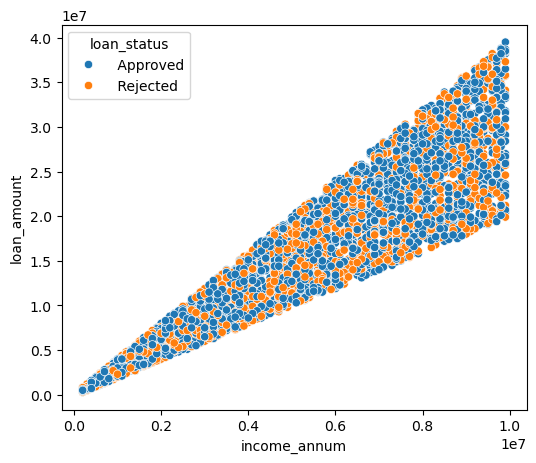

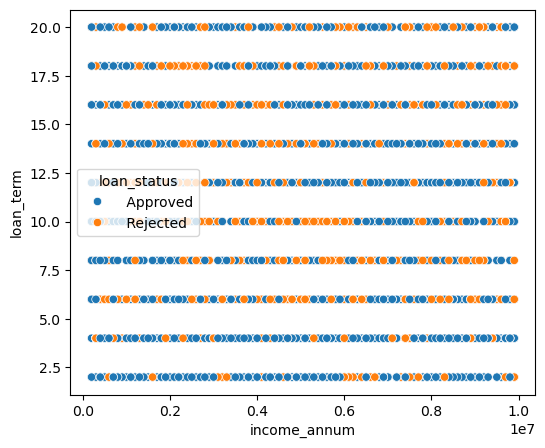

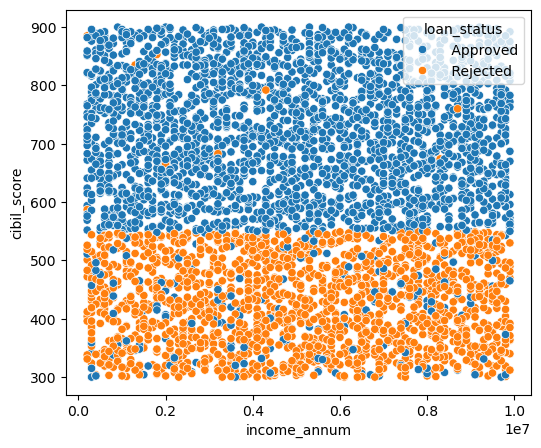

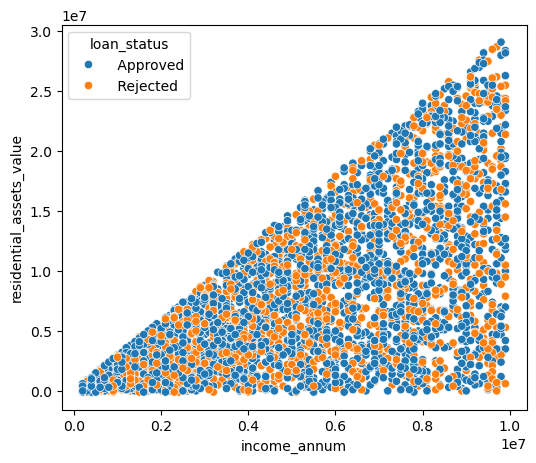

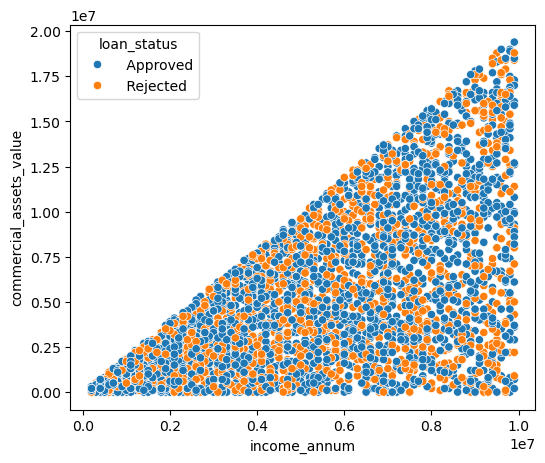

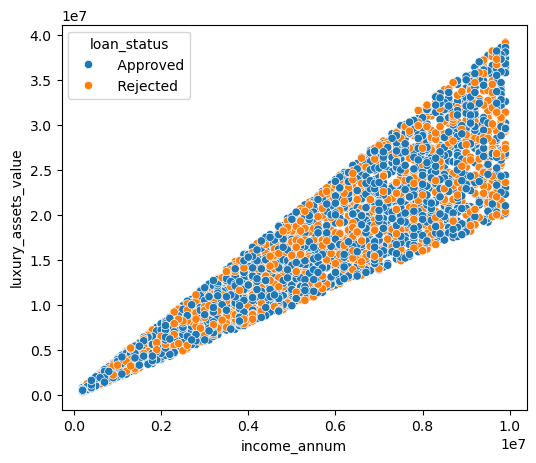

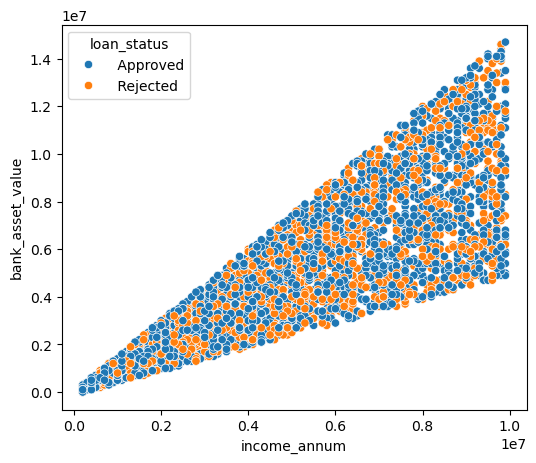

In [45]:
# for num in df[numerical]:

for num in df[numerical]:
    plt.figure(figsize=(6,5))
    sns.scatterplot(df,x='income_annum',y=num,hue='loan_status') 

In [40]:
df[numerical].corr()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.006737,0.000216,0.002386,0.015848
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.640718,0.641498,0.930093,0.850424
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.597658,0.605096,0.862732,0.787576
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,0.001318,-0.005899,0.013522,0.016951
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019119,-0.003302,-0.032040,-0.010174
residential_assets_value,0.006737,0.640718,0.597658,0.001318,-0.019119,1.000000,0.423827,0.598418,0.527412
commercial_assets_value,0.000216,0.641498,0.605096,-0.005899,-0.003302,0.423827,1.000000,0.591514,0.550547
luxury_assets_value,0.002386,0.930093,0.862732,0.013522,-0.032040,0.598418,0.591514,1.000000,0.789462
bank_asset_value,0.015848,0.850424,0.787576,0.016951,-0.010174,0.527412,0.550547,0.789462,1.000000


<Axes: >

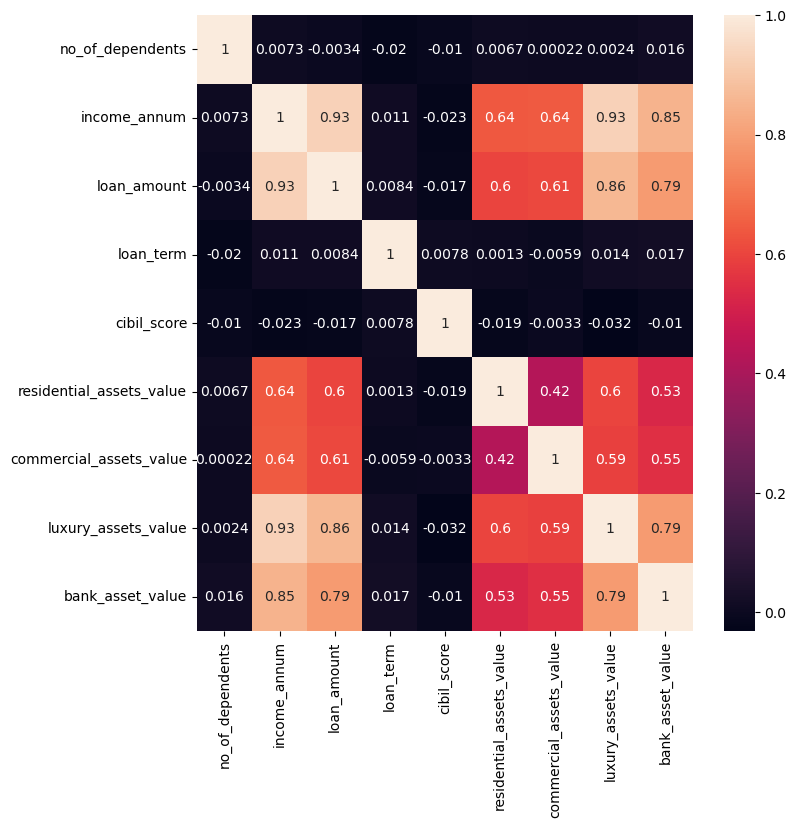

In [41]:
plt.figure(figsize=(8,8))
sns.heatmap(df[numerical].corr(),annot=True)

> From the above graphs we can say that as income level increases than <b> bank_asset_value,luxury_assets_value ,
  commercial_assets_value,residential_assets_value and loan_amount</b> also increases</b>
  
> In <b>Cibil_score</b> it is very clear that people having score above than <b>550 have approved loan and below 
  than 550</b> are rejected. 

# <center>Detecting Outliers<center>

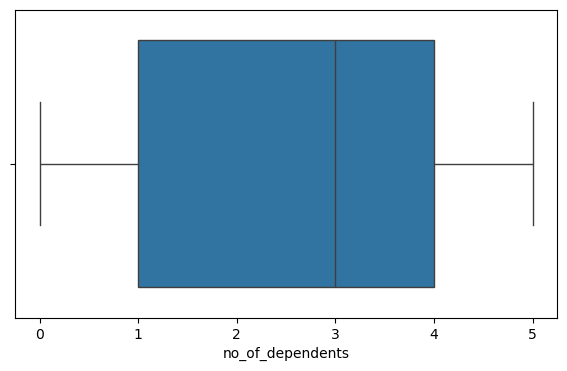

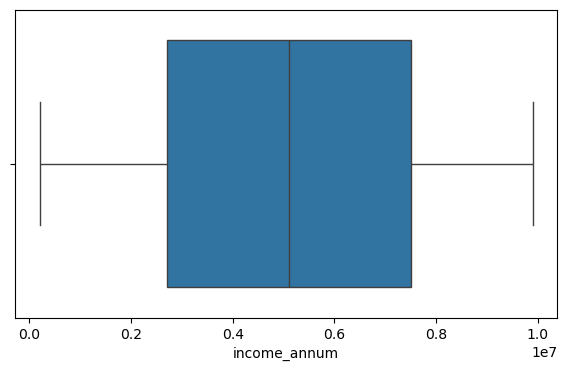

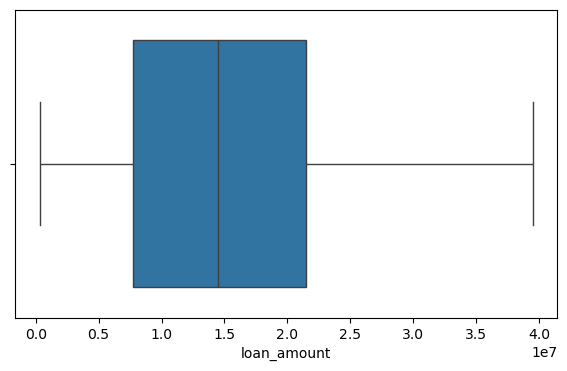

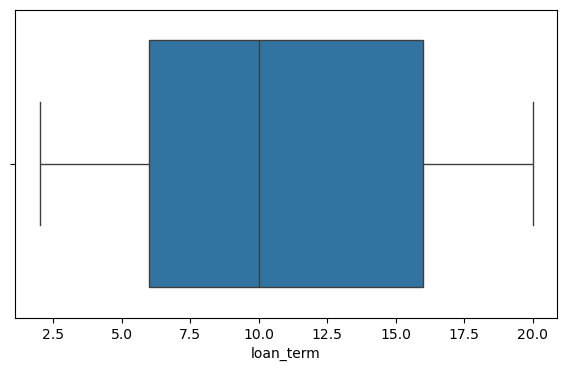

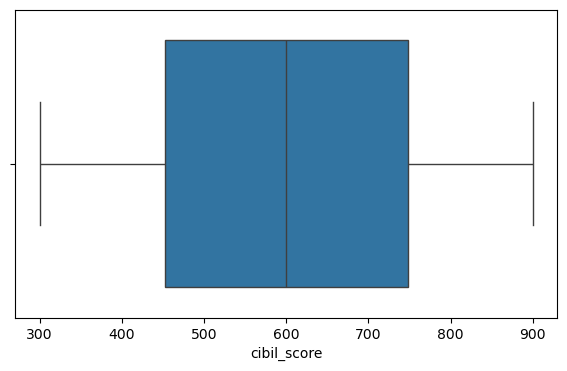

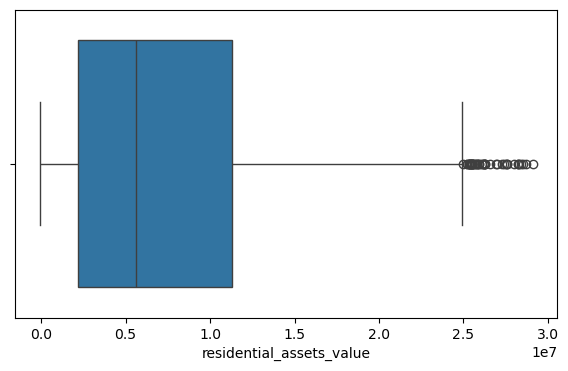

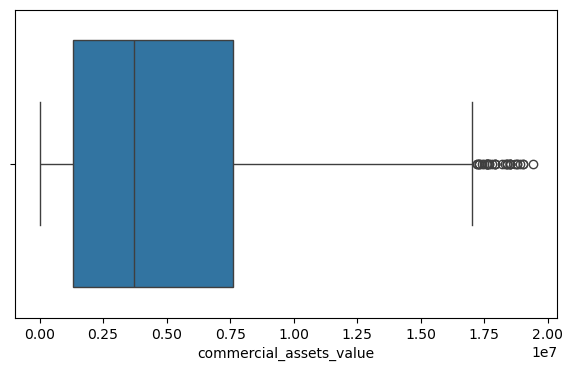

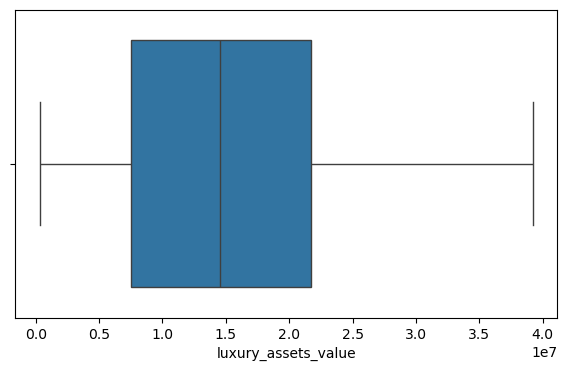

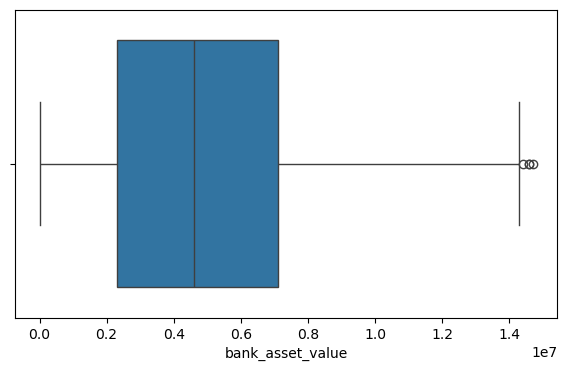

In [46]:
for col in df[numerical]:
    plt.figure(figsize=(7,4))
    sns.boxplot(df,x=col)
    